In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [9]:

img=np.array([[0,1,2,3,4,5,6],
              [0,0,1,2,3,4,5],
              [0,0,0,1,2,3,4],
              [0,0,0,0,1,2,3],
              [0,0,0,0,0,1,2],
              [0,0,0,0,0,0,1]])
img2=cv.imread('D:/imageprocessing/trans_negative.jpg',0)
img3=cv.imread('D:/imageprocessing/aasdf.png',0)


In [10]:
def histogram(img):
    w=img.shape[0]
    h=img.shape[1]
    his=np.zeros(np.max(img)+1)
    for x in  range (w):
        for y in range (h):
            pixel=img[x,y]
            his[pixel]+=1
    return his
def auto_thesshold(img):
    h_g=histogram(img)
    T_g=np.cumsum(h_g)
    A_g=[]
    for i, his in enumerate(h_g): A_g.append(i*his)
    A_g=np.array(A_g)
    B_g=np.cumsum(A_g)
    M_g=[]
    for i in range(len(A_g)):
        M_g.append(B_g[i]/T_g[i])
    M_g=np.array(M_g)
    f_g =lambda a,b:a/(img.shape[0]*img.shape[1]-a)*(b-np.max(M_g))**2
    F_g=[]
    for i in range(len(A_g)-1):
        F_g.append(f_g(T_g[i],M_g[i]))
    theshold=np.argmax(F_g)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img[x,y] = np.where(img[x,y] >= theshold, 255, 0)
    return img

In [11]:
img_segmentation=auto_thesshold(img)


In [12]:
print(img_segmentation)

[[  0 255 255 255 255 255 255]
 [  0   0 255 255 255 255 255]
 [  0   0   0 255 255 255 255]
 [  0   0   0   0 255 255 255]
 [  0   0   0   0   0 255 255]
 [  0   0   0   0   0   0 255]]


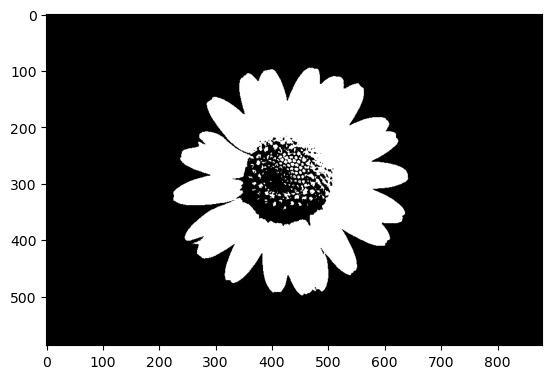

In [13]:
img_segmentation1=auto_thesshold(img2)
plt.imshow(img_segmentation1,cmap='gray')

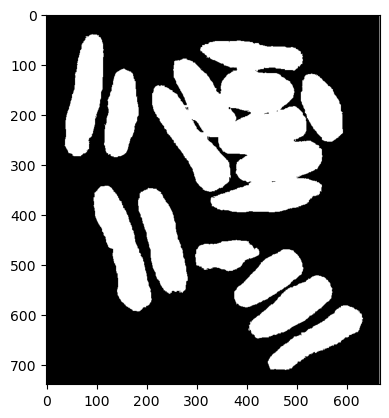

In [14]:
img_segmentation2=auto_thesshold(img3)
plt.imshow(img_segmentation2,cmap='gray')